# Week 6-income_evaluation_dataset

## 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Import dataset  

In [3]:
df=pd.read_csv('income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 3. Explore the data to gain insights about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [6]:
df.iloc[:,-1].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [9]:
def remove_leading_spaces(columns):
    return [column.strip() for column in columns]

col = df.columns
col = remove_leading_spaces(col)
df.columns=col

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
                     'race', 'sex', 'native-country', 'income']

label_encoders = {}

for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [22]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


## 4. Check the distribution of variables

<Axes: >

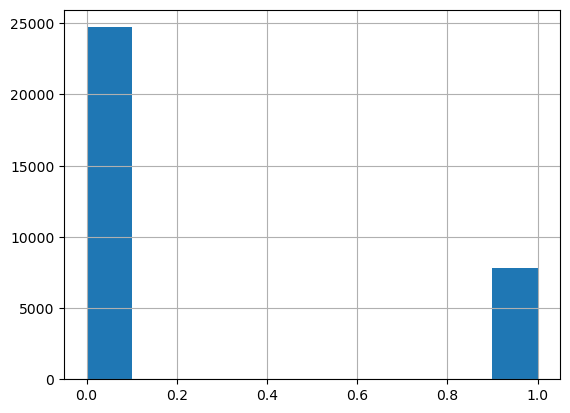

In [23]:
df["income"].hist()

In [24]:
df["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

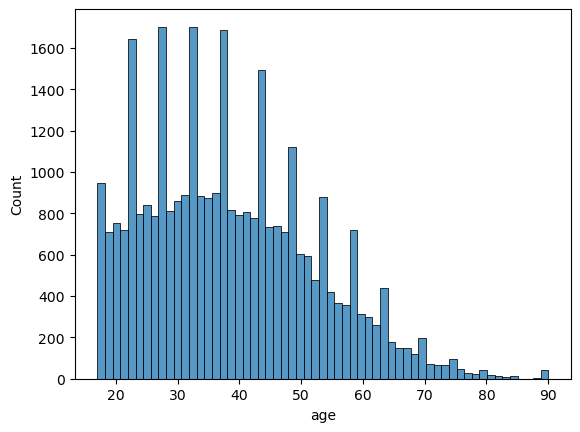

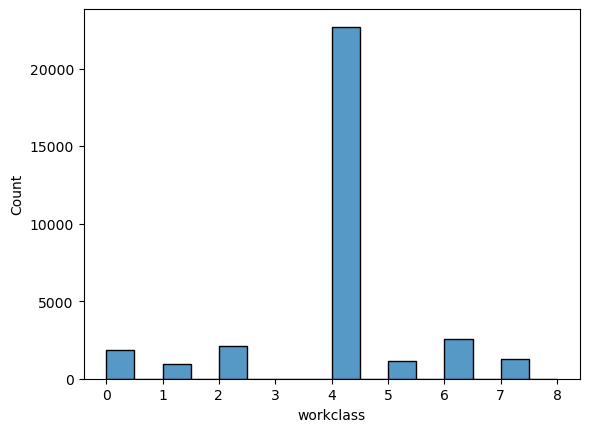

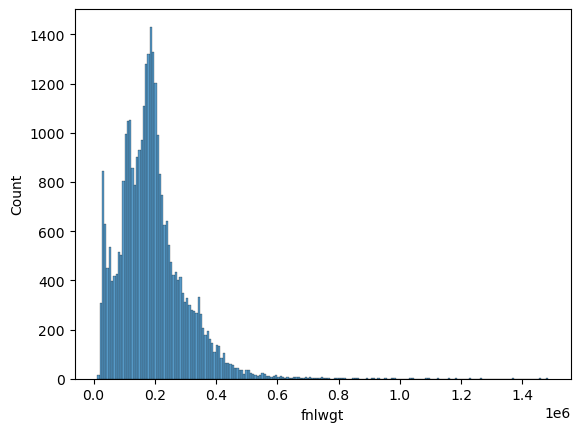

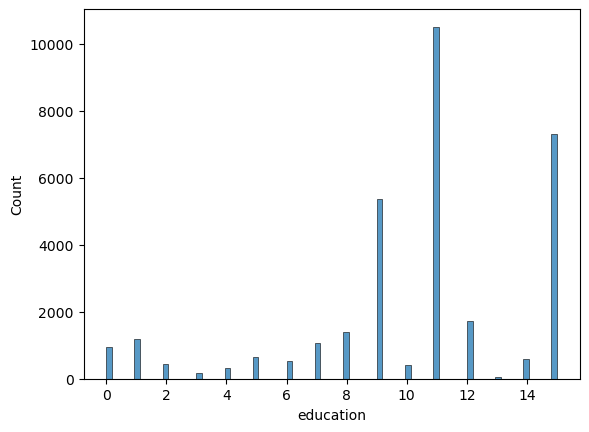

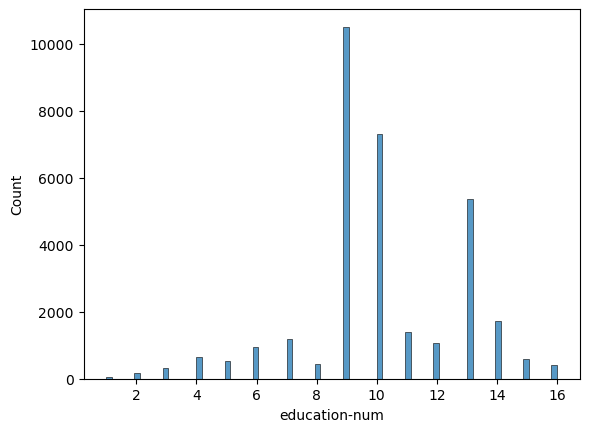

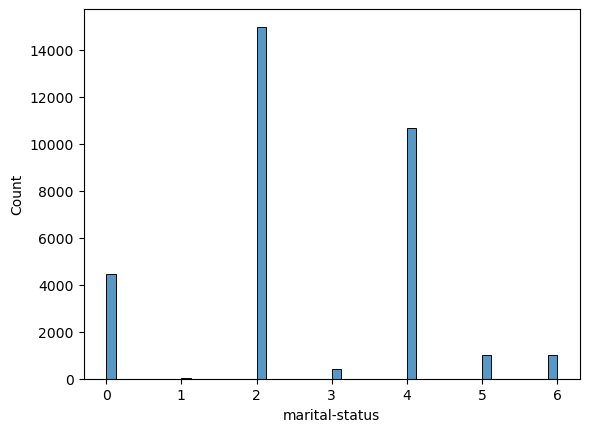

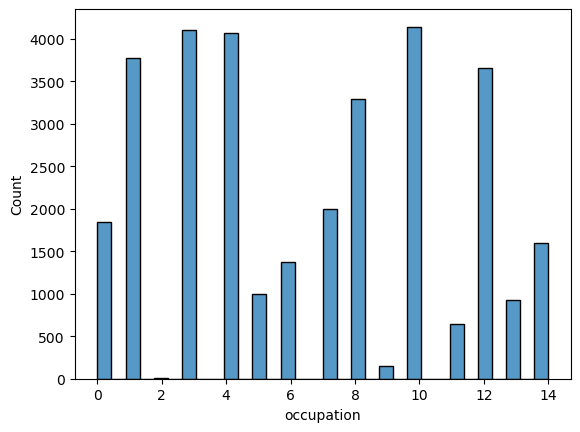

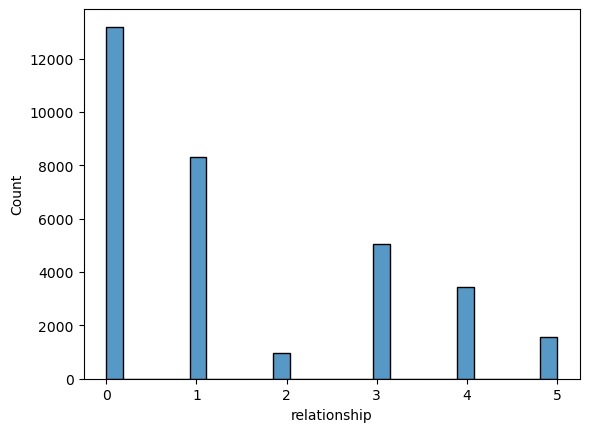

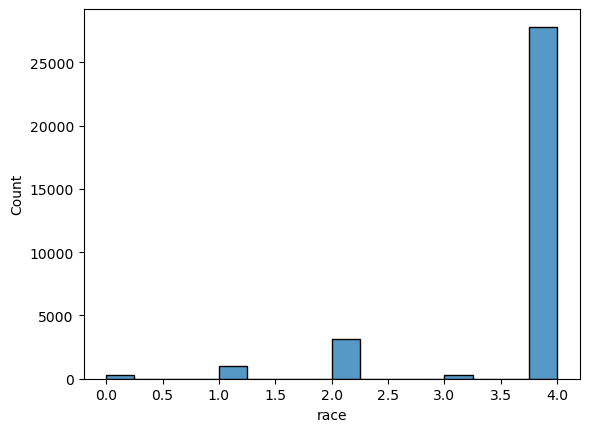

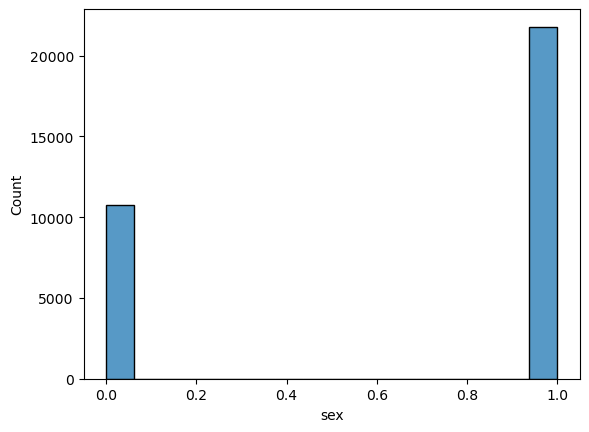

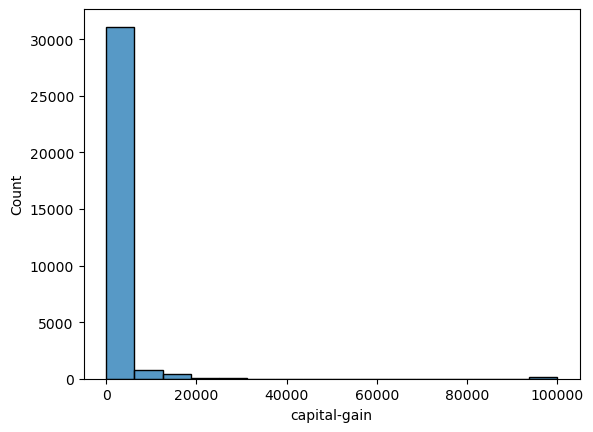

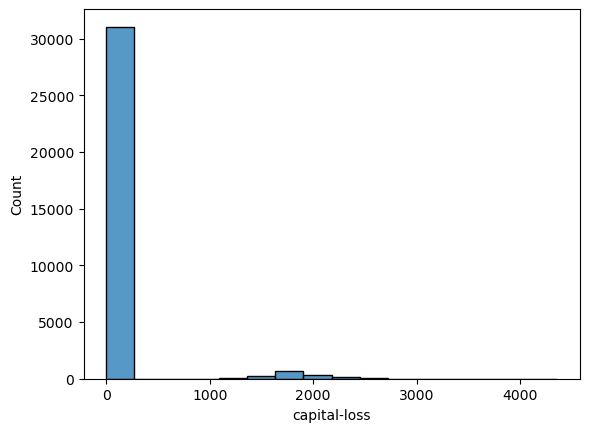

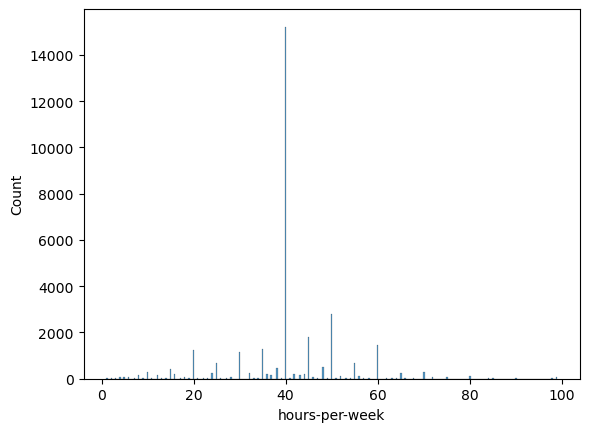

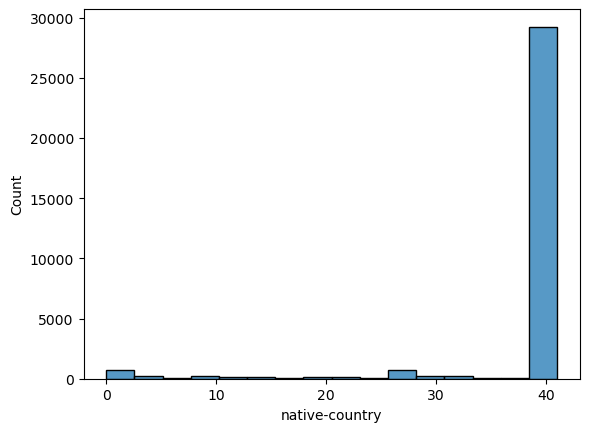

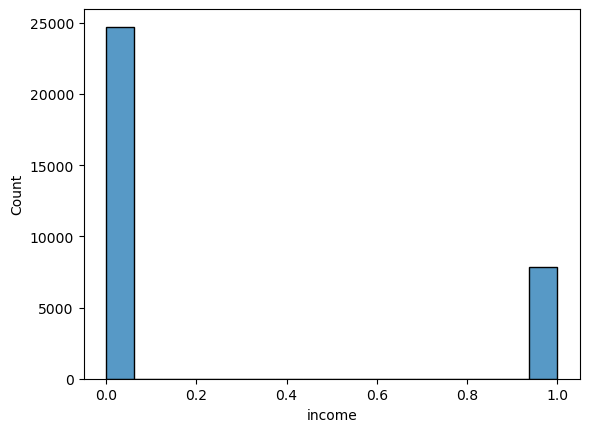

In [25]:
for col in df.columns:
    sns.histplot(data=df[col])
    plt.xlabel(col)
    plt.show()

## 5. Split data into separate training and test set 

In [26]:
X=df.iloc[:,:-1]
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [27]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int32

In [28]:
y.value_counts()

0    24720
1     7841
Name: income, dtype: int64

## 6. Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
#standard scaling is feature scaling
from sklearn.preprocessing import StandardScaler

def scale(df):
    scaler = StandardScaler()
    for col in df.columns:
        df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))#scaling should be done to the col values
    return df

X = scale(X)
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.030671,2.150579,-1.063611,-0.335437,1.134739,0.921634,-1.317809,-0.277805,0.393668,0.703071,0.148453,-0.21666,-0.035429,0.291569
1,0.837109,1.463736,-1.008707,-0.335437,1.134739,-0.406212,-0.608387,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-2.222153,0.291569
2,-0.042642,0.090050,0.245079,0.181332,-0.420060,-1.734058,-0.135438,-0.277805,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.291569
3,1.057047,0.090050,0.425801,-2.402511,-1.197459,-0.406212,-0.135438,-0.900181,-1.962621,0.703071,-0.145920,-0.21666,-0.035429,0.291569
4,-0.775768,0.090050,1.408176,-0.335437,1.134739,-0.406212,0.810458,2.211698,-1.962621,-1.422331,-0.145920,-0.21666,-0.035429,-4.054223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.090050,0.639741,-0.852205,0.746039,-0.406212,1.519881,2.211698,0.393668,-1.422331,-0.145920,-0.21666,-0.197409,0.291569
32557,0.103983,0.090050,-0.335433,0.181332,-0.420060,-0.406212,0.101036,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.291569
32558,1.423610,0.090050,-0.358777,0.181332,-0.420060,2.249480,-1.317809,1.589322,0.393668,-1.422331,-0.145920,-0.21666,-0.035429,0.291569
32559,-1.215643,0.090050,0.110960,0.181332,-0.420060,0.921634,-1.317809,0.966947,0.393668,0.703071,-0.145920,-0.21666,-1.655225,0.291569


In [31]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=5)#use this so that wont take all 0s only

In [33]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
21425,1.203672,0.090050,0.458914,0.181332,-0.420060,-0.406212,-0.844861,-0.900181,0.393668,0.703071,-0.14592,-0.21666,-0.035429,0.291569
28707,-1.069018,0.090050,1.105480,0.181332,-0.420060,0.921634,-0.371912,1.589322,0.393668,0.703071,-0.14592,-0.21666,-0.035429,0.291569
4455,0.690484,1.463736,0.221336,-1.368974,-2.363558,-0.406212,-0.844861,-0.900181,0.393668,0.703071,-0.14592,-0.21666,-0.035429,-1.881327
2231,-0.189267,0.090050,-0.591884,-0.335437,1.134739,0.921634,-0.608387,0.966947,0.393668,-1.422331,-0.14592,-0.21666,-0.035429,0.291569
18864,1.057047,0.090050,-0.816615,-0.335437,1.134739,-0.406212,-0.135438,-0.900181,0.393668,0.703071,-0.14592,-0.21666,1.179417,0.291569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,1.130359,0.090050,0.287419,1.214869,-0.031360,-1.734058,-1.317809,-0.277805,0.393668,0.703071,-0.14592,-0.21666,-0.845327,0.291569
26301,0.250608,0.090050,0.205959,-2.402511,-1.197459,-0.406212,0.101036,-0.900181,0.393668,0.703071,-0.14592,-0.21666,-0.035429,0.291569
20463,3.403049,1.463736,-0.225028,0.181332,-0.420060,2.249480,1.283407,-0.277805,0.393668,-1.422331,-0.14592,-0.21666,0.774468,0.291569
18638,-0.189267,0.090050,2.645969,0.181332,-0.420060,-1.734058,1.283407,1.589322,-1.962621,-1.422331,-0.14592,-0.21666,-1.250276,0.291569


In [34]:
X_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
32264,-0.482518,0.090050,0.674341,-2.402511,-1.197459,-0.406212,-0.844861,-0.900181,0.393668,0.703071,-0.145920,4.850916,-0.845327,0.291569
28024,-0.555830,0.090050,0.441623,1.214869,-0.031360,0.921634,1.283407,-0.277805,0.393668,-1.422331,-0.145920,-0.216660,-0.035429,0.291569
9347,1.496922,0.090050,-0.133487,1.214869,-0.031360,-0.406212,-1.317809,2.211698,0.393668,-1.422331,-0.145920,-0.216660,-2.141163,-4.054223
10427,-0.115955,0.090050,-0.710701,1.214869,-0.031360,0.921634,0.101036,-0.277805,0.393668,-1.422331,-0.145920,-0.216660,-0.035429,0.291569
4810,0.103983,0.090050,-0.095325,-0.335437,1.134739,-1.734058,1.283407,-0.277805,0.393668,0.703071,-0.145920,3.664677,1.584366,0.291569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22533,0.690484,0.090050,-0.605281,-1.110590,-1.974858,-0.406212,0.101036,-0.900181,0.393668,0.703071,-0.145920,-0.216660,-0.035429,-0.730971
934,-0.115955,0.090050,-0.026948,-2.402511,-1.197459,-0.406212,0.101036,-0.900181,0.393668,0.703071,0.274245,-0.216660,0.288530,0.291569
6546,-0.922393,-1.283635,-0.116500,-0.852205,0.746039,-0.406212,1.046932,-0.900181,0.393668,0.703071,-0.145920,-0.216660,0.369519,0.291569
31812,0.617171,1.463736,0.651073,1.214869,-0.031360,-0.406212,0.337510,2.211698,0.393668,-1.422331,-0.145920,-0.216660,0.936448,0.291569


In [35]:
y_train

21425    0
28707    0
4455     0
2231     0
18864    0
        ..
3046     0
26301    0
20463    0
18638    0
2915     0
Name: income, Length: 26048, dtype: int32

In [36]:
y_test

32264    0
28024    0
9347     1
10427    0
4810     1
        ..
22533    0
934      1
6546     1
31812    0
8192     0
Name: income, Length: 6513, dtype: int32

## Run SVM MODELS
7. Run SVM with default hyperparameters 

    Run SVM with rbf kernel and C=1.0 and gamma=auto 
    
    Run SVM with rbf kernel and C=100.0
    
    Run SVM with rbf kernel and C=1000.0
    
8. Run SVM with linear kernel

    Run SVM with linear kernel and C=1.0
    
    Run SVM with linear kernel and C=100.0
    
    Run SVM with linear kernel and C=1000.0
    
9. Run SVM with polynomial kernel

    Run SVM with polynomial kernel and C=1.0
    
    Run SVM with polynomial kernel and C=100.0
    
    Run SVM with polynomial kernel and C=1000.0
    
10. Run SVM with sigmoid kernel 

    Run SVM with sigmoid kernel and C=1.0
    
    Run SVM with sigmoid kernel and C=100.0
    
    Run SVM with sigmoid kernel and C=1000.0
    
11. Compare the train-set and test-set accuracy

12. Check for overfitting and underfitting

13. visualize confusion matrix with seaborn heatmap

14. Generate classification report 

15. Evaluate classification accuracy

16. Evaluate Classification error


In [37]:
def running_svm(model,c):
    cl=svm.SVC(kernel=model,C=c)
    return cl

In [38]:
svm_default_1=running_svm("rbf",1.0)
svm_default_2=running_svm("rbf",100.0)
svm_default_3=running_svm("rbf",1000.0)

In [39]:
svm_linear_1=running_svm("linear",1.0)
svm_linear_2=running_svm("linear",100.0)
svm_linear_3=running_svm("linear",1000.0)

In [40]:
svm_poly_1=running_svm("poly",1.0)
svm_poly_2=running_svm("poly",100.0)
svm_poly_3=running_svm("poly",1000.0)

In [41]:
svm_sigmoid_1=running_svm("poly",1.0)
svm_sigmoid_2=running_svm("poly",100.0)
svm_sigmoid_3=running_svm("poly",1000.0)

In [42]:
models = {
    'svm_rbf_C1': svm_default_1,
    'svm_rbf_C100': svm_default_2,
    'svm_rbf_C1000': svm_default_3,
    'svm_linear_C1': svm_linear_1,
    'svm_linear_C100': svm_linear_2,
    'svm_linear_C1000': svm_linear_3,
    'svm_poly_C1': svm_poly_1,
    'svm_poly_C100': svm_poly_2,
    'svm_poly_C1000': svm_poly_3,
    'svm_sigmoid_C1': svm_sigmoid_1,
    'svm_sigmoid_C100': svm_sigmoid_2,
    'svm_sigmoid_C1000': svm_sigmoid_3
}

In [43]:
def fit_test_svm(models,X_test,X_train,y_test,y_train):
    for model in models:
        mod=models[model]
        mod.fit(X_train,y_train)
        y_pred=mod.predict(X_test)
        y_train_pred=mod.predict(X_train)
        print("Model name",model)
        print("Test set metrics")
        print("Accuracy:",accuracy_score(y_test, y_pred))
        print("Precision:",precision_score(y_test, y_pred))
        print("Recall:",recall_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print("Train set metrics")
        print("Accuracy:",accuracy_score(y_train,y_train_pred))
        print("Precision:",precision_score(y_train,y_train_pred))
        print("Recall:",recall_score(y_train,y_train_pred))
        print("Classification report is")
        print(classification_report(y_train,y_train_pred))
        print("confusion matrix is")
        cm=confusion_matrix(y_test,y_pred)
        sns.heatmap(cm,annot=True)
        plt.show()

Model name svm_rbf_C1
Test set metrics
Accuracy: 0.8461538461538461
Precision: 0.7513812154696132
Recall: 0.5271317829457365
              precision    recall  f1-score   support

           0       0.87      0.95      0.90      4965
           1       0.75      0.53      0.62      1548

    accuracy                           0.85      6513
   macro avg       0.81      0.74      0.76      6513
weighted avg       0.84      0.85      0.84      6513

Train set metrics
Accuracy: 0.8557662776412777
Precision: 0.7754126846220678
Recall: 0.5672969966629589
Classification report is
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     19755
           1       0.78      0.57      0.66      6293

    accuracy                           0.86     26048
   macro avg       0.82      0.76      0.78     26048
weighted avg       0.85      0.86      0.85     26048

confusion matrix is


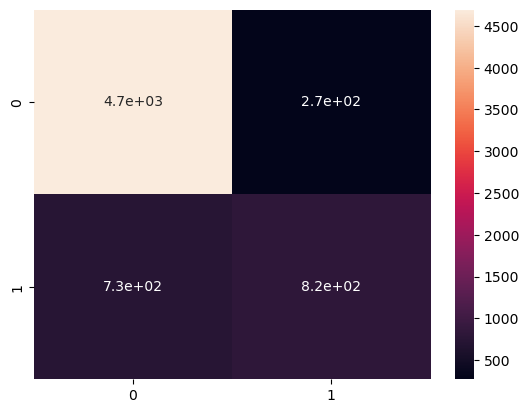

Model name svm_rbf_C100
Test set metrics
Accuracy: 0.8446184553968985
Precision: 0.7161290322580646
Recall: 0.5736434108527132
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4965
           1       0.72      0.57      0.64      1548

    accuracy                           0.84      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.84      0.84      0.84      6513

Train set metrics
Accuracy: 0.8913160319410319
Precision: 0.8344281298299846
Recall: 0.6863181312569522
Classification report is
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     19755
           1       0.83      0.69      0.75      6293

    accuracy                           0.89     26048
   macro avg       0.87      0.82      0.84     26048
weighted avg       0.89      0.89      0.89     26048

confusion matrix is


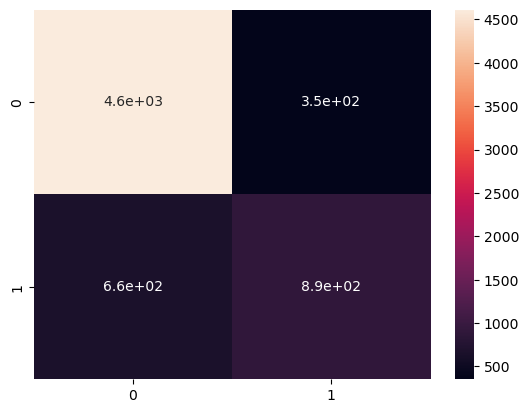

Model name svm_rbf_C1000
Test set metrics
Accuracy: 0.8292645478274221
Precision: 0.6598240469208211
Recall: 0.5813953488372093
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4965
           1       0.66      0.58      0.62      1548

    accuracy                           0.83      6513
   macro avg       0.77      0.74      0.75      6513
weighted avg       0.82      0.83      0.83      6513

Train set metrics
Accuracy: 0.9137745700245701
Precision: 0.8606309035822491
Recall: 0.7673605593516606
Classification report is
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     19755
           1       0.86      0.77      0.81      6293

    accuracy                           0.91     26048
   macro avg       0.89      0.86      0.88     26048
weighted avg       0.91      0.91      0.91     26048

confusion matrix is


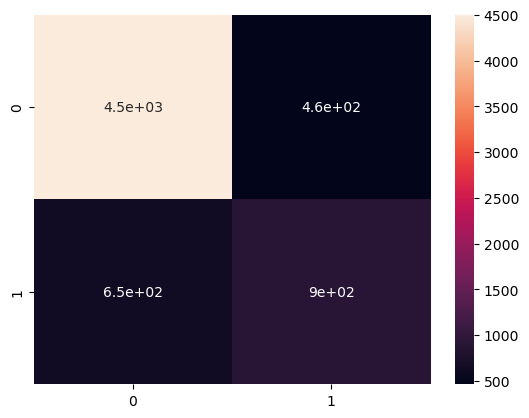

Model name svm_linear_C1
Test set metrics
Accuracy: 0.8088438507600184
Precision: 0.7769652650822669
Recall: 0.2745478036175711
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4965
           1       0.78      0.27      0.41      1548

    accuracy                           0.81      6513
   macro avg       0.79      0.62      0.65      6513
weighted avg       0.80      0.81      0.77      6513

Train set metrics
Accuracy: 0.8139204545454546
Precision: 0.7915322580645161
Recall: 0.3119338948037502
Classification report is
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     19755
           1       0.79      0.31      0.45      6293

    accuracy                           0.81     26048
   macro avg       0.80      0.64      0.67     26048
weighted avg       0.81      0.81      0.78     26048

confusion matrix is


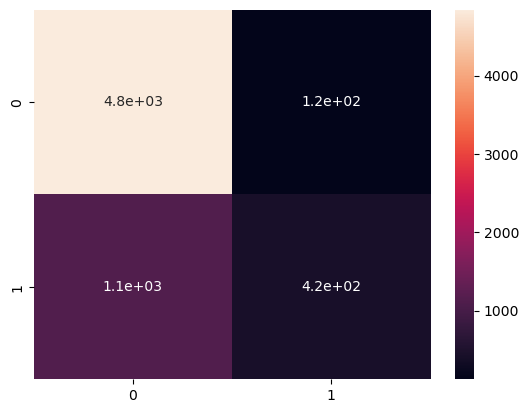

Model name svm_linear_C100
Test set metrics
Accuracy: 0.8085367726086289
Precision: 0.7761467889908257
Recall: 0.27325581395348836
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4965
           1       0.78      0.27      0.40      1548

    accuracy                           0.81      6513
   macro avg       0.79      0.62      0.65      6513
weighted avg       0.80      0.81      0.77      6513

Train set metrics
Accuracy: 0.8138820638820639
Precision: 0.7914481645824929
Recall: 0.3117749880819959
Classification report is
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     19755
           1       0.79      0.31      0.45      6293

    accuracy                           0.81     26048
   macro avg       0.80      0.64      0.67     26048
weighted avg       0.81      0.81      0.78     26048

confusion matrix is


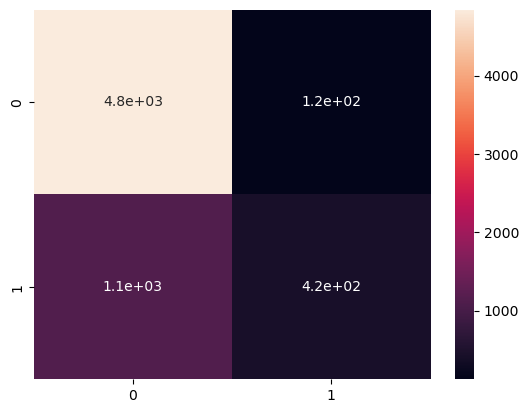

In [ ]:
fit_test_svm(models,X_test,X_train,y_test,y_train)

## 17. Plot ROC Curve
## 18. Compute ROC AUC

In [ ]:
from sklearn import metrics
def plot_roc_auc(models,X_test,X_train,y_test,y_train):
    for model in models:
        mod=models[model]
        mod.fit(X_train,y_train)
        y_pred=mod.predict(X_test)
        fpr,tpr,_ =metrics.roc_curve(y_test,y_pred)
        auc=metrics.roc_auc_score(y_test,y_pred)
        plt.title('Roc and Auc for Model '+str(model))
        plt.plot(fpr,tpr,label="AUC="+str(auc))
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()  

In [ ]:
plot_roc_auc(models,X_test,X_train,y_test,y_train)

## 19. Stratified k-fold cross-validation with shuffle split with linear kernel
## 21. Stratified k-fold cross-validation with shuffle split with rbf kernel
## 22. Stratified k-fold cross-validation with shuffle split with polynomial kernel
## 23. Stratified k-fold cross-validation with shuffle split with sigmoid kernel

In [ ]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, cross_val_score
from sklearn.svm import SVC


# Linear kernel with stratified k-fold cross-validation and shuffle split
linear_svc = SVC(kernel='linear')
linear_cv = StratifiedKFold(n_splits=5, shuffle=True)
linear_scores = cross_val_score(linear_svc, X, y, cv=linear_cv)
print("Linear kernel with stratified k-fold cross-validation and shuffle split:")
print("Mean Accuracy:", linear_scores.mean())

# RBF kernel with stratified k-fold cross-validation and shuffle split
rbf_svc = SVC(kernel='rbf')
rbf_cv = StratifiedKFold(n_splits=5, shuffle=True)
rbf_scores = cross_val_score(rbf_svc, X, y, cv=rbf_cv)
print("RBF kernel with stratified k-fold cross-validation and shuffle split:")
print("Mean Accuracy:", rbf_scores.mean())

# Polynomial kernel with stratified k-fold cross-validation and shuffle split
poly_svc = SVC(kernel='poly')
poly_cv = StratifiedKFold(n_splits=5, shuffle=True)
poly_scores = cross_val_score(poly_svc, X, y, cv=poly_cv)
print("Polynomial kernel with stratified k-fold cross-validation and shuffle split:")
print("Mean Accuracy:", poly_scores.mean())

# Sigmoid kernel with stratified k-fold cross-validation and shuffle split
sigmoid_svc = SVC(kernel='sigmoid')
sigmoid_cv = StratifiedKFold(n_splits=5, shuffle=True)
sigmoid_scores = cross_val_score(sigmoid_svc, X, y, cv=sigmoid_cv)
print("Sigmoid kernel with stratified k-fold cross-validation and shuffle split:")
print("Mean Accuracy:", sigmoid_scores.mean())

In [ ]:
def stratified_shuffle_split(models, X, y):
    results = {}
    for model_name, model_instance in models.items():
        sss = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=0)
        scores = []
        for train_index, test_index in sss.split(X, y):
            X_train, X_test = np.array(X)[train_index], np.array(X)[test_index]#for the indexing to be proper np.array use
            y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
            try:
                model_instance.fit(X_train, y_train)
                pred = model_instance.predict(X_test)
                scores.append(accuracy_score(y_test, pred))
            except Exception as e:
                print(f"Error occurred with model {model_name}: {str(e)}")
                scores.append(None)
        results[model_name] = scores
        print('Shuffle split scores for model:', model_name)
        print(scores)
    return results


In [ ]:
results=stratified_shuffle_split(models,X,y)